In [14]:
import pandas as pd

In [15]:
path='C:\\Users\dmckenzie\Desktop\Doctored Room And Labels.csv'

In [16]:
DATIS=pd.read_csv(path)

In [17]:
DATIS

,UniqueId,Name,OccupancyType,Area,Perimeter,WEBenchmarkingDept
0,'-1028317551:3164766,WORKROOM,NaN,552.076416,96.020833,Amenity
1,'-1274529740:3684468,CAFE / GATHERING,B,972.589695,147.986971,Amenity
2,1274885439:4630147,MOTHER'S,B,182.863241,73.362111,Amenity
3,1274885439:4722876,MOTHER'S,B,376.254259,133.750000,Amenity
4,1274885439:5410216,LIBRARY,A3,450.132802,91.591851,Amenity
...,...,...,...,...,...,...
1426,985698166:3893227,COPY/PRINT,NaN,41.992188,29.312500,Support
1427,985698166:3965930,HUB,NaN,799.240614,170.944250,AMENITY
1428,985698166:3967098,CIRCULATION,NaN,5160.998853,1338.965741,CIRCULATION
1429,985698166:4020879,HUB,NaN,798.466200,174.756750,AMENITY


<AxesSubplot:>

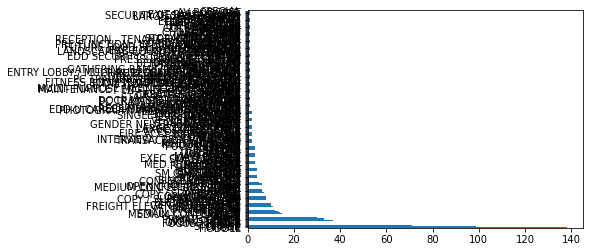

In [13]:
DATIS['Name'].value_counts().plot(kind='barh')

In [6]:
import re
def preprocessor(text): 
    text = re.sub(r'[^\w\s]','', text)
    text = text.lower()
    return text

In [7]:
DATIS['Name'].apply(preprocessor)

0              workroom
1       cafe  gathering
2               mothers
3               mothers
4               library
             ...       
1426          copyprint
1427                hub
1428        circulation
1429                hub
1430                hub
Name: Name, Length: 1431, dtype: object

In [8]:
DATIS['CleanName']=DATIS['Name'].str.replace('/',' ').replace({' +':' '},regex=True).apply(preprocessor)

In [9]:
DATIS['CleanName']

0             workroom
1       cafe gathering
2              mothers
3              mothers
4              library
             ...      
1426        copy print
1427               hub
1428       circulation
1429               hub
1430               hub
Name: CleanName, Length: 1431, dtype: object

In [10]:
len(DATIS['Name'].value_counts())-len(DATIS['CleanName'].value_counts())

6

In [11]:
DATIS['NameLen']=DATIS['Name'].str.len()
DATIS['Name']=DATIS['Name'].str.lower()
DATIS['TokenCount']=((DATIS['Name'].str.len()-DATIS['Name'].str.replace(' ','').str.len())+1)
DATIS['SpaceRatio']=(DATIS['Area']/DATIS['Perimeter'])

<AxesSubplot:>

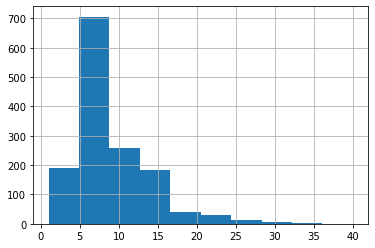

In [12]:
DATIS['NameLen'].hist()

<AxesSubplot:>

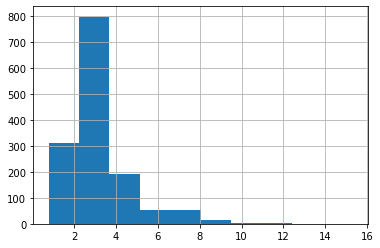

In [13]:
DATIS['SpaceRatio'].hist()

In [14]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
import pickle

In [15]:
import pandas as pd
import numpy as np
from numpy import random
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt


In [16]:
DATIS.WEBenchmarkingDept=DATIS.WEBenchmarkingDept.str.lower()

In [17]:
DATIS.drop_duplicates(['WEBenchmarkingDept','CleanName']).groupby(['WEBenchmarkingDept'])['WEBenchmarkingDept'].count()

WEBenchmarkingDept
amenity                      27
circulation                  43
collaboration: closed        49
collaboration: open          26
desking: open workstation    10
desking: private office      38
lab                           4
services 2                    1
services1                    34
support                      53
Name: WEBenchmarkingDept, dtype: int64

In [18]:
y = DATIS.WEBenchmarkingDept.str.lower()

In [19]:
X = DATIS['CleanName']

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state = 42)

In [21]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

In [351]:

#finding

from sklearn.linear_model import SGDClassifier
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer


parameters = {
    #'tfidf__ngram_range': ((1, 1), (1, 2),(1, 3),(1,4)), 
    'tfidf__max_df': (0.25,.4 ,0.5,.6,0.75, 1.0),
    'tfidf__use_idf': (True, False),
    'tfidf__sublinear_tf': (True, False),
    'tfidf__smooth_idf' : (True, False),
    'tfidf__min_df' : (1, 2,3),
    'tfidf__norm': ('l1', 'l2'),
    #'clf__alpha': (0.00001, 0.000001,0.0001,0.001,0.01)
    #'clf__loss': ('log', 'perceptron'),
    #'clf__loss': ('hinge', 'log', 'modified_huber', 'squared_hinge', 'perceptron'),
    #'clf__penalty': ('l2', 'elasticnet','l1')
}


pipeline = Pipeline([
               ('tfidf', TfidfVectorizer()),
               ('clf', SGDClassifier(loss='log',penalty='l1')),
              ])

grid_search = GridSearchCV(pipeline, parameters, n_jobs=-1)
grid_search.fit(X_train, y_train)

from sklearn.metrics import classification_report
y_pred = grid_search.predict(X_test)

print('accuracy %s' % accuracy_score(y_pred, y_test))
print(classification_report(y_test, y_pred))

C:\Users\dmckenzie\Anaconda3\envs\Three Seven\lib\site-packages\sklearn\model_selection\_split.py:672: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.


accuracy 0.8116279069767441
                           precision    recall  f1-score   support

                  amenity       1.00      1.00      1.00         6
              circulation       0.54      0.60      0.57        50
    collaboration: closed       0.91      0.90      0.91       131
      collaboration: open       0.82      0.58      0.68        24
desking: open workstation       0.91      1.00      0.95        20
  desking: private office       0.93      0.81      0.87       108
                      lab       0.00      0.00      0.00         2
               services 2       0.50      1.00      0.67         1
                services1       0.87      0.61      0.71        33
                  support       0.65      0.95      0.77        55

                 accuracy                           0.81       430
                macro avg       0.71      0.75      0.71       430
             weighted avg       0.83      0.81      0.81       430



C:\Users\dmckenzie\Anaconda3\envs\Three Seven\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.


In [21]:
grid_search.best_params_

NameError: name 'grid_search' is not defined

In [27]:
from sklearn.linear_model import SGDClassifier
from sklearn.feature_extraction.text import TfidfVectorizer


tfidfvec=TfidfVectorizer(ngram_range=(1,3),max_df=.25,min_df=1,norm='l2',smooth_idf=True,sublinear_tf=False,use_idf=True)
mod=SGDClassifier(penalty='l1',loss='log',alpha=0.00001)

#vectorizer.fit(X_train)
#X_train2=vectorizer.transform(X_train)
#X_test2=vectorizer.transform(X_test)




text_clf = Pipeline([ 
    ('tfidf', tfidfvec),
    ('clf', mod),
])


text_clf.fit(X_train, y_train)

#mod.fit(X_train2, y_train)

from sklearn.metrics import classification_report
#y_pred = mod.predict(X_test2)
y_pred2 = text_clf.predict(X_test)
print('accuracy %s' % accuracy_score(y_pred2, y_test))
print(classification_report(y_test, y_pred2))


#print('accuracy %s' % accuracy_score(y_pred, y_test))
#print(classification_report(y_test, y_pred))

accuracy 0.8296089385474861
                           precision    recall  f1-score   support

                  amenity       1.00      1.00      1.00         5
              circulation       0.56      0.53      0.55        43
    collaboration: closed       0.93      0.90      0.91       100
      collaboration: open       0.68      0.79      0.73        19
desking: open workstation       0.89      0.89      0.89        19
  desking: private office       0.91      0.88      0.90        92
                      lab       0.00      0.00      0.00         2
               services 2       0.50      1.00      0.67         1
                services1       0.76      0.87      0.81        30
                  support       0.80      0.83      0.81        47

                 accuracy                           0.83       358
                macro avg       0.70      0.77      0.73       358
             weighted avg       0.83      0.83      0.83       358



C:\Users\dmckenzie\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [1]:
from skl2onnx import convert_sklearn
from skl2onnx.common.data_types import StringTensorType
from onnxmltools import save_model
from onnxruntime import InferenceSession

ModuleNotFoundError: No module named 'skl2onnx'

In [46]:
onnx_model = convert_sklearn(text_clf,
name='DocClassifierCV-Tfidf-LSVC',
initial_types=[('input', StringTensorType([1, 1]))]
)

save_model(onnx_model, 'cv.onnx')
sess = InferenceSession("cv.onnx")
label_name = sess.get_outputs()[0].name
input_name = sess.get_inputs()[0].name

res = sess.run(None, input_feed={'input': np.array([['hello world']])})

In [47]:
res

[array(['services1'], dtype=object),
 [{'amenity': 0.07348394393920898,
   'circulation': 0.044751111418008804,
   'collaboration: closed': 0.07773763686418533,
   'collaboration: open': 0.04349435120820999,
   'desking: open workstation': 0.031024377793073654,
   'desking: private office': 0.049801651388406754,
   'lab': 0.04049787297844887,
   'services 2': 0.039142508059740067,
   'services1': 0.4987942576408386,
   'support': 0.10127229988574982}]]

In [43]:
with open("TextClassifier1.onnx", "wb") as f:
    f.write(onnx_model.SerializeToString())

In [42]:
res

[array(['services1'], dtype=object),
 [{'amenity': 0.07348394393920898,
   'circulation': 0.044751111418008804,
   'collaboration: closed': 0.07773763686418533,
   'collaboration: open': 0.04349435120820999,
   'desking: open workstation': 0.031024377793073654,
   'desking: private office': 0.049801651388406754,
   'lab': 0.04049787297844887,
   'services 2': 0.039142508059740067,
   'services1': 0.4987942576408386,
   'support': 0.10127229988574982}]]

In [336]:
import pickle

In [337]:
pickle.dump(vectorizer, open('C:\\Users\dmckenzie\documents\\roomvectorizer.pickle', "wb"))

In [338]:
pickle.dump(mod, open('C:\\Users\dmckenzie\documents\\roommodel.pickle', "wb"))

In [357]:
matchdf=pd.DataFrame({'A':list(y_pred[X_test.isin(list(X_train))==False]),
              'B':list(y_test[X_test.isin(list(X_train))==False])})

In [358]:
matchdf['C']=(matchdf['A']==matchdf['B'])*1

In [359]:
matchdf['D']=1

In [360]:
labels=list(matchdf.groupby(['A'])['D'].sum().index)

In [361]:
scores=list(matchdf.groupby(['A'])['C'].sum().values/matchdf.groupby(['A'])['D'].sum().values)

In [362]:
print('Accuracy:',matchdf['C'].sum()/matchdf['D'].sum())

Accuracy: 0.5172413793103449


In [363]:
pd.DataFrame({'Category':labels,'Guesses':list(matchdf.groupby(['A'])['D'].sum().values),'True Positive Rate':scores})

,Category,Guesses,True Positive Rate
0,collaboration: closed,5,1.000000
1,collaboration: open,1,1.000000
2,desking: open workstation,1,0.000000
3,desking: private office,2,0.500000
4,services 2,1,0.000000
5,services1,12,0.500000
6,support,7,0.285714


In [364]:
X_train2

<1073x430 sparse matrix of type '<class 'numpy.float64'>'
	with 2094 stored elements in Compressed Sparse Row format>

C:\Users\dmckenzie\Anaconda3\envs\Three Seven\lib\site-packages\sklearn\model_selection\_split.py:672: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
C:\Users\dmckenzie\Anaconda3\envs\Three Seven\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\dmckenzie\Anaconda3\envs\Three Seven\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\dmckenzie\Anaconda3\envs\Three Seven\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py", line 728, in fit
    sample_weight=sample_weight)
  File "C:\Users\dmckenzie\Anaconda3\envs\Three Seven\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py", line 566, in _fit
    classes, sample_weight, coef

<AxesSubplot:title={'center':'Classifier Validation Score As Training Data Grows'}, xlabel='Training Data Size', ylabel='Validation Score'>

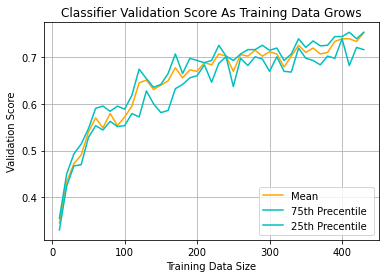

In [370]:
import numpy as np
from sklearn.model_selection import learning_curve
from sklearn.datasets import load_iris
from sklearn.linear_model import Ridge

#np.random.seed(0)
#X, y = load_iris(return_X_y=True)
#indices = np.arange(y.shape[0])
#np.random.shuffle(indices)
#X, y = X[indices], y[indices]

train_sizes, train_scores, valid_scores = learning_curve(SGDClassifier(penalty='l1',loss='log',alpha=0.00001),
                                                         X_train2, y_train, train_sizes=[10,20,30,40,50,60,70,80,90,100,
                                                                                         110,120,130,140,150,160,170,180,190,200,
                                                                                         210,220,230,240,250,260,270,280,290,300,
                                                                                         310,320,330,340,350,360,370,380,390,400,
                                                                                        410,420,430],cv=5)
pd.DataFrame({'Mean':list(pd.DataFrame(valid_scores.transpose()).median()),
             '75th Precentile ':list(pd.DataFrame(valid_scores.transpose()).quantile(0.75)),
             '25th Precentile':list(pd.DataFrame(valid_scores.transpose()).quantile(0.25))},
             index=train_sizes).plot(color = ['orange', 'c','c'],
                                    xlabel='Training Data Size',ylabel='Validation Score',
                                     grid=True,title='Classifier Validation Score As Training Data Grows')

<AxesSubplot:>

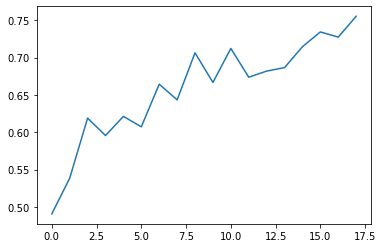

In [180]:
pd.DataFrame(valid_scores.transpose()).mean().plot()

<AxesSubplot:>

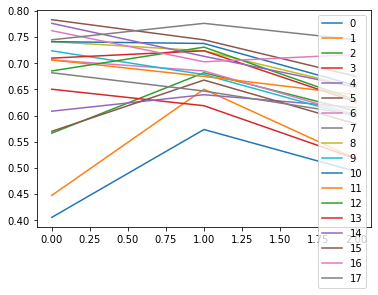

In [159]:
pd.DataFrame(pd.DataFrame(valid_scores.transpose())).plot()